In [311]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import math
import pandas as pd
from sklearn import naive_bayes

In [281]:
train = np.load('fashion_train.npy')
test = np.load('fashion_test.npy')

test.shape

(5000, 785)

In [282]:
def find_x_y(data):
    Y = data[:,-1]
    X = np.delete(data,-1,axis=1)
    mean_vectors = []
    for cl in range(5):
        mean_vectors.append(np.mean(X[Y==cl],axis=0))
    return X,Y,mean_vectors

label_dict = {0:'T_shirts', 1:'Trouseres', 2:'Pullover', 3: 'Dress', 4:'Shirt'}

train_X, train_y, train_mean_vec = find_x_y(train)
test_X, test_y, test_mean_vec = find_x_y(test)



In [283]:
def find_S_W(X,Y,mean_vectors):
    S_W = np.zeros((784,784))
    for cl,mv in zip(range(5),mean_vectors):
        class_sc_mat = np.zeros((784,784))
        for row in X[Y==cl]:
            row,mv = row.reshape(784,1),mv.reshape(784,1)
            class_sc_mat+= (row-mv).dot((row-mv).T)
        S_W += class_sc_mat
    return S_W
    
train_SW = find_S_W(train_X,train_y, train_mean_vec)
test_SW = find_S_W(test_X,test_y,test_mean_vec)


In [214]:
for i in range(784):
    test_SW[i][i]=test_SW[i][i]+0.00000000000000000000001

In [215]:
def find_S_B(X,Y, mean_vectors):
    overall_mean = np.mean(X,axis= 0)
    S_B = np.zeros((784,784))
    for i,mean_vec in enumerate(mean_vectors):
        n=X[Y==i,:].shape[0]
        mean_vec=mean_vec.reshape(784,1)
        overall_mean = overall_mean.reshape(784,1)
        S_B+=n*(mean_vec-overall_mean).dot((mean_vec-overall_mean).T)
    return S_B

train_SB = find_S_B(train_X, train_y, train_mean_vec)
test_SB = find_S_B(test_X,test_y,test_mean_vec)

In [216]:
def find_eigen(S_W,S_B):
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
    eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]
    eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse= True)
    eigenvalues_sum = sum(eigenvalues)
    for i, j in enumerate(eigen_pairs):
        print ("Eigenvalue {0:}: {1:.2%}". format(i,(j[0]/eigenvalues_sum).real))
    return eigen_pairs

train_pairs = find_eigen(train_SW, train_SB)
test_pairs = find_eigen(test_SW,test_SB)

Eigenvalue 0: 61.11%
Eigenvalue 1: 20.24%
Eigenvalue 2: 13.13%
Eigenvalue 3: 5.52%
Eigenvalue 4: 0.00%
Eigenvalue 5: 0.00%
Eigenvalue 6: 0.00%
Eigenvalue 7: 0.00%
Eigenvalue 8: 0.00%
Eigenvalue 9: 0.00%
Eigenvalue 10: 0.00%
Eigenvalue 11: 0.00%
Eigenvalue 12: 0.00%
Eigenvalue 13: 0.00%
Eigenvalue 14: 0.00%
Eigenvalue 15: 0.00%
Eigenvalue 16: 0.00%
Eigenvalue 17: 0.00%
Eigenvalue 18: 0.00%
Eigenvalue 19: 0.00%
Eigenvalue 20: 0.00%
Eigenvalue 21: 0.00%
Eigenvalue 22: 0.00%
Eigenvalue 23: 0.00%
Eigenvalue 24: 0.00%
Eigenvalue 25: 0.00%
Eigenvalue 26: 0.00%
Eigenvalue 27: 0.00%
Eigenvalue 28: 0.00%
Eigenvalue 29: 0.00%
Eigenvalue 30: 0.00%
Eigenvalue 31: 0.00%
Eigenvalue 32: 0.00%
Eigenvalue 33: 0.00%
Eigenvalue 34: 0.00%
Eigenvalue 35: 0.00%
Eigenvalue 36: 0.00%
Eigenvalue 37: 0.00%
Eigenvalue 38: 0.00%
Eigenvalue 39: 0.00%
Eigenvalue 40: 0.00%
Eigenvalue 41: 0.00%
Eigenvalue 42: 0.00%
Eigenvalue 43: 0.00%
Eigenvalue 44: 0.00%
Eigenvalue 45: 0.00%
Eigenvalue 46: 0.00%
Eigenvalue 47: 0.00%

In [284]:
W_train = np.hstack((train_pairs[0][1].reshape(784,1),train_pairs[1][1].reshape(784,1)))
W_test =  np.hstack((test_pairs[0][1].reshape(784,1),test_pairs[1][1].reshape(784,1)))

In [285]:
X_train_lda = train_X.dot(W_train)
X_test_lda=test_X.dot(W_test)


In [286]:
def plot_step_lda(X_lda,Y):
    for label, color in zip(range(5),("blue","red","purple","green","orange")):
        plt.scatter(x=X_lda[:,0].real[Y==label],
        y = (X_lda[:,1].real[Y==label]), color = color , alpha=0.5, label = label_dict[label])

    plt.xlabel("LD1")
    plt.ylabel("LD2")
    leg = plt.legend(loc= "upper left", fancybox = True)
    leg.get_frame().set_alpha(0.5)
    plt.title("LDA: Clothes onto the first two linear discrimineant")



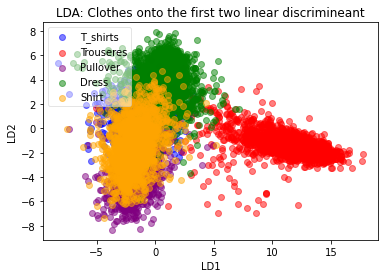

In [287]:
plot_step_lda(X_train_lda,train_y)

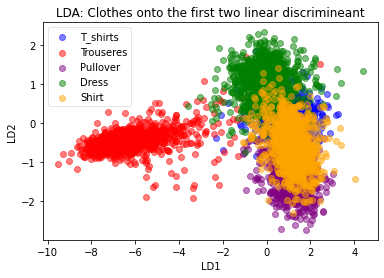

In [288]:
plot_step_lda(X_test_lda,test_y)

ValueError: zero-size array to reduction operation minimum which has no identity

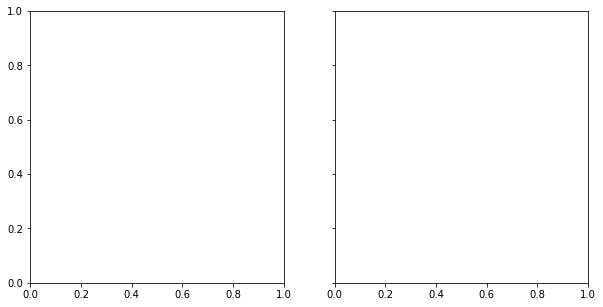

In [237]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)


sns.histplot(x=X_train_lda[:,0], binwidth=1, ax = axs[0])
sns.histplot(x=X_train_lda[:,1], binwidth= 1, ax=axs[1])

<AxesSubplot:ylabel='Density'>

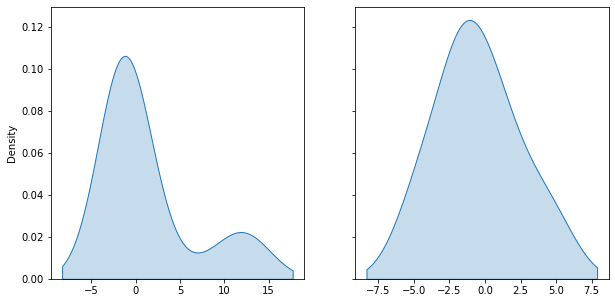

In [28]:
fig, axs = plt.subplots(1,2, figsize = (10,5), sharey = True)

sns.kdeplot(x=X_1, ax=axs[0], fill = True, bw_method= 1/2, cut = 0)

sns.kdeplot(x=X_2, ax=axs[1], fill = True, bw_method= 1/2, cut = 0)

In [304]:
class NaiveBayesClassifier:
    def __init__(self, alpha=1e-10):
        self.class_probs = {}  # P(class)
        self.feature_probs = {}  # P(feature | class)
        self.alpha = alpha  # Laplace smoothing parameter

    def fit(self, X, y):
        # Calculate P(class)
        classes, counts = np.unique(y, return_counts=True)
        total_samples = len(y)
        for c, count in zip(classes, counts):
            self.class_probs[c] = count / total_samples

        # Calculate P(feature | class)
        for c in classes:
            class_mask = (y == c)
            class_samples = X[class_mask]
            for feature in range(X.shape[1]):
                feature_values, feature_counts = np.unique(class_samples[:, feature], return_counts=True)
                total_feature_values = len(np.unique(X[:, feature]))
                feature_probs_given_class = dict(zip(feature_values, (feature_counts + self.alpha) / (len(class_samples) + total_feature_values * self.alpha)))
                if feature not in self.feature_probs:
                    self.feature_probs[feature] = {}
                self.feature_probs[feature][c] = feature_probs_given_class

    def predict(self, X):
        predictions = []
        for sample in X:
            max_log_prob = float('-inf')
            predicted_class = None
            for c, class_prob in self.class_probs.items():
                log_prob = np.log(class_prob)
                for feature, value in enumerate(sample):
                    if value in self.feature_probs[feature][c]:
                        log_prob += np.log(self.feature_probs[feature][c][value])
                    else:
                        log_prob += np.log(self.alpha / (len(self.feature_probs[feature][c]) + self.alpha))
                if log_prob > max_log_prob or predicted_class is None:
                    max_log_prob = log_prob
                    predicted_class = c
            predictions.append(predicted_class)
        return predictions



In [305]:
X_test_lda[:,0]= X_test_lda[:,0]*-1

In [ ]:
Bayes =

In [319]:
Bayes = NaiveBayesClassifier()
Bayes.fit(X_train_lda.real, train_y)
Pred = Bayes.predict(X_test_lda.real)
Pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


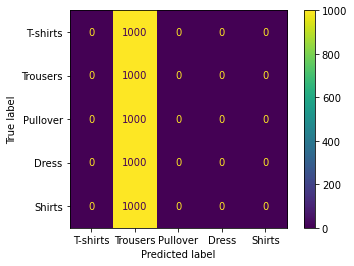

In [320]:
confusion_matrix = metrics.confusion_matrix(test_y,Pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['T-shirts','Trousers','Pullover','Dress','Shirts'])
cm_display.plot()